<a href="https://colab.research.google.com/github/Rioba-Ian/Statistics/blob/main/Portfolio_Allocation%26_Sharpe_Ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install quandl

In [2]:
import pandas as pd
import quandl as ql 

In [3]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [5]:
aapl = ql.get('WIKI/AAPL.11', start_date=start, end_date=end)
cisco = ql.get('WIKI/CSCO.11', start_date=start, end_date=end)
ibm = ql.get('WIKI/IBM.11', start_date=start, end_date=end)
amzn = ql.get('WIKI/AMZN.11', start_date=start, end_date=end)

In [6]:
aapl

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183
...,...
2016-12-23,115.080808
2016-12-27,115.811668
2016-12-28,115.317843


In [7]:
aapl.iloc[0]

Adj. Close    52.848787
Name: 2012-01-03 00:00:00, dtype: float64

In [8]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [9]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [10]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


In [11]:
# 30% of our money is going into apple
# 20% in cisco
# 40% in amazon
# 10% in ibm

In [13]:
list(zip((aapl, cisco, ibm, amzn),[.3,.2,.4,.1]))

[(            Adj. Close  Normed Return
  Date                                 
  2012-01-03   52.848787       1.000000
  2012-01-04   53.132802       1.005374
  2012-01-05   53.722681       1.016536
  2012-01-06   54.284287       1.027162
  2012-01-09   54.198183       1.025533
  ...                ...            ...
  2016-12-23  115.080808       2.177549
  2016-12-27  115.811668       2.191378
  2016-12-28  115.317843       2.182034
  2016-12-29  115.288214       2.181473
  2016-12-30  114.389454       2.164467
  
  [1258 rows x 2 columns], 0.3), (            Adj. Close  Normed Return
  Date                                 
  2012-01-03   15.617341       1.000000
  2012-01-04   15.919125       1.019324
  2012-01-05   15.860445       1.015566
  2012-01-06   15.801764       1.011809
  2012-01-09   15.902359       1.018250
  ...                ...            ...
  2016-12-23   29.475311       1.887345
  2016-12-27   29.620129       1.896618
  2016-12-28   29.369111       1.880545
  201

In [14]:
for stock_df, allo in zip((aapl, cisco, ibm, amzn),[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [15]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [16]:
aapl.tail()

,Adj. Close,Normed Return,Allocation
Date,,,
2016-12-23,115.080808,2.177549,0.653265
2016-12-27,115.811668,2.191378,0.657413
2016-12-28,115.317843,2.182034,0.654610
2016-12-29,115.288214,2.181473,0.654442
2016-12-30,114.389454,2.164467,0.649340


In [17]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Position Values'] = stock_df['Allocation']*1000000

In [18]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [19]:
all_pos_vals = [aapl['Position Values'], cisco['Position Values'],
                ibm['Position Values'], amzn['Position Values']]

portfolio_val = pd.concat(all_pos_vals, axis=1)

In [20]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [21]:
portfolio_val.columns = ['AAPL Pos', 'CISCO Pos', 'IBM Pos', 'AMZN Pos']

In [23]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [24]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

Text(0.5, 1.0, 'Total Portfolio Value')

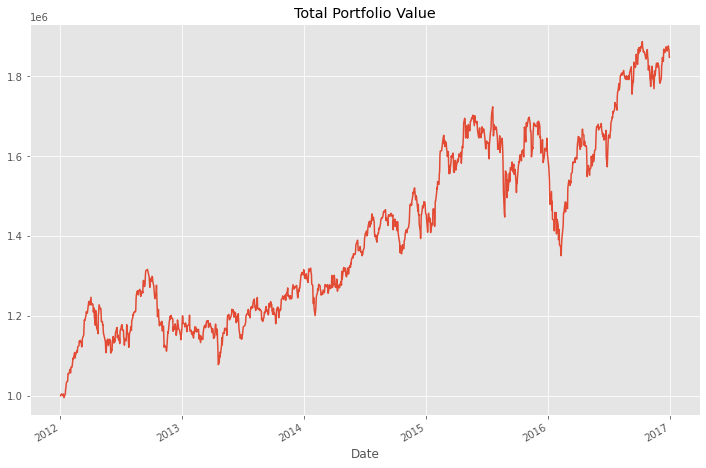

In [27]:
portfolio_val['Total Pos'].plot(figsize=(12,8))
plt.title('Total Portfolio Value')

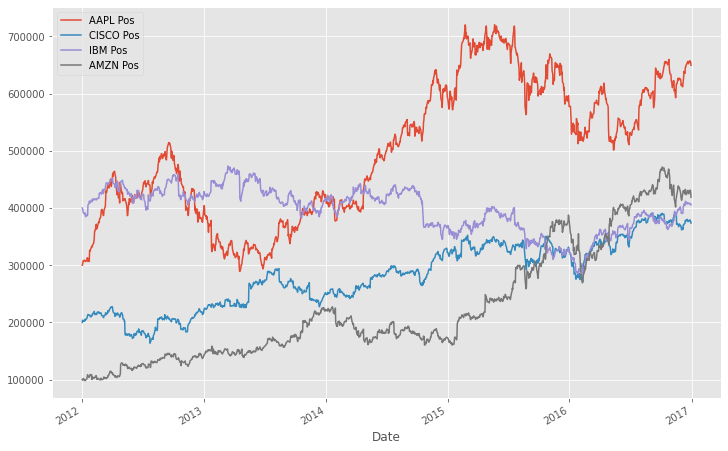

In [28]:
portfolio_val.drop('Total Pos', axis=1).plot(figsize=(12,8))

So how do we actually get to know how much we should invest in each stock 

This is where we shall use some portfolio statistics to help us determine the amount we shall invest for each

# Portfolio Stats

In [30]:
portfolio_val.tail()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2016-12-23,653264.617079,377469.015679,407359.955612,424839.412389,1.862933e+06
2016-12-27,657413.396830,379323.596496,408410.671112,430877.506563,1.876025e+06
2016-12-28,654610.167268,376108.989746,406089.322915,431285.259454,1.868094e+06
2016-12-29,654441.973495,376603.544631,407091.167926,427386.471541,1.865523e+06
2016-12-30,649340.095692,373636.215323,405600.618032,418851.589119,1.847429e+06


In [31]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [32]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487


In [33]:
portfolio_val['Daily Return'].mean()

0.0005442330716215244

In [34]:
portfolio_val['Daily Return'].std()

0.010568287769161718

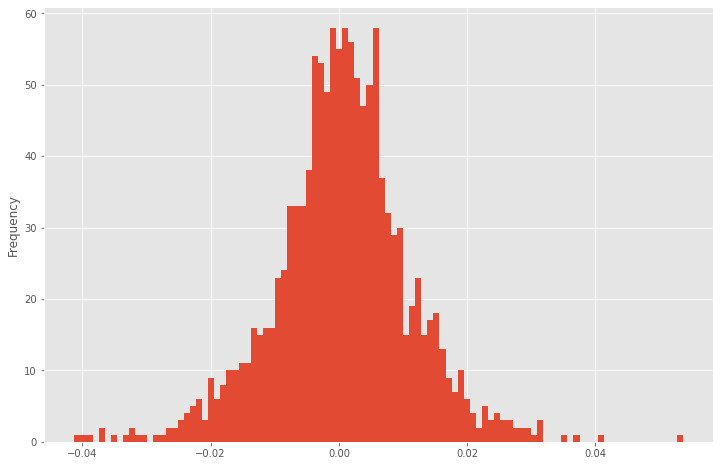

In [35]:
portfolio_val['Daily Return'].plot(kind='hist', bins=100, figsize=(12,8))

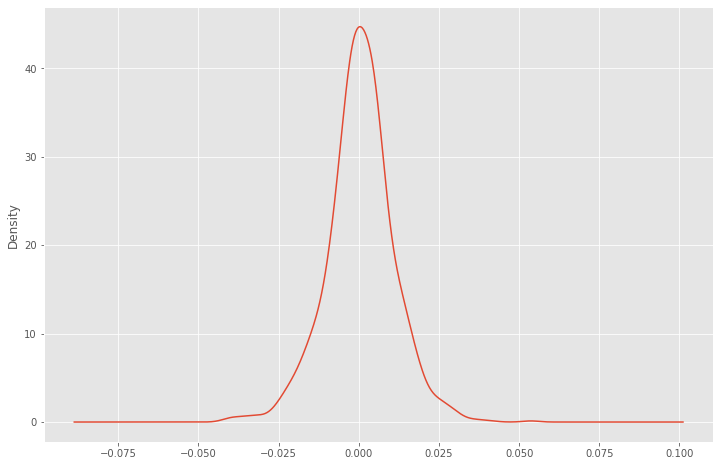

In [37]:
portfolio_val['Daily Return'].plot(kind='kde', figsize=(12,8))

In [38]:
cumulative_return = 100* (portfolio_val['Total Pos'][-1]/ portfolio_val['Total Pos'][0] - 1)

In [39]:
cumulative_return

84.74285181665545

In [40]:
portfolio_val['Total Pos'][-1]

1847428.5181665544

In [41]:
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()

In [42]:
SR

0.05149680662648092

In [43]:
ARS= (252**0.5) * SR
ARS 

0.8174864618859096

Generally a Sharpe ratio greater than 1 is considered good and acceptable to investors

A ratio greater than 2 is very good 

3 or higher is quite excellent